# Problem 1

You are given "fitbit.csv" file containing information activities carrried out during the day and burned calories  estimate  throughout  the  day.

We  are  going  to  select  important  features  affecting  calories burned. 

* First,  using  mutual  information  score  find  the  top-4  features  having  the  highest  relationship  with  the target ("calories burned" column).

* Second, using `Recursive Feature Elimination` method with Ridge regressor find top-4 feature combination.

Note that you should drop the "Date" column.


In [70]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/fitbit.csv", thousands=',')

# Drop Date column.
df = df.drop(labels=["Date"], axis=1)
df.head()


,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2682,12541,9.02,13,667,171,18,60,1248
1,2423,8029,5.70,35,760,208,13,6,928
2,2875,10801,7.67,3,496,148,18,46,1040
3,2638,11997,8.52,22,771,248,3,27,1285
4,2423,9039,6.42,12,714,232,10,16,1044


In [75]:
# Extract X and y.
y_df = df["Calories Burned"]
X_df = df.drop(labels=["Calories Burned"], axis=1)
X, y = X_df.to_numpy(), y_df.to_numpy()

### Using `mutual_info_regression`

In [81]:
from sklearn.feature_selection import mutual_info_regression

# Score of each column
scores = mutual_info_regression(X, y)

# Indices of highest relationship
indices = np.argsort(scores)[::-1][:4]

# Names at the indices
list(X_df.columns[indices])

['Activity Calories', 'Minutes Fairly Active', 'Steps', 'Distance']

### Using `f1_score`

In [76]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

model = SelectKBest(k=5, score_func=f_classif)
model.fit(X, y)

# Indices of highest relationship
indices = np.argsort(model.scores_)[::-1][:4]

# Names at the indices
list(X_df.columns[indices])

['Activity Calories', 'Steps', 'Distance', 'Minutes Very Active']

### Using `chi2`

In [103]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

model = SelectKBest(k=5, score_func=chi2)
model.fit(X, y)

# Score of each column
scores = model.scores_

# Indices of highest relationship
indices = np.argsort(scores)[::-1][:4]

# Names at the indices
list(X_df.columns[indices])

['Steps', 'Activity Calories', 'Floors', 'Minutes Sedentary']

### Using `RFE` and `Ridge`

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

model = RFE(estimator=Ridge(), n_features_to_select=4, step=1)
model.fit(X, y)

list(X_df.columns[model.support_])

['Distance',
 'Minutes Lightly Active',
 'Minutes Fairly Active',
 'Minutes Very Active']

# Problem 2

You are given "customer.csv" file containing information to be used for the segmentation of customers.

Cluster customer information using K-means algorithm. Produce Elbow and silhouette coefficient plots for cluster numbers ranging from 2 to 9. 

Before clustering apply standartscaling to the attributes. You can drop the "ID" column.

In [104]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/customer.csv", thousands=',')

# Drop Date column.
df = df.drop(labels=["ID"], axis=1)
df.head()

,Visit.Time,Average.Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [109]:
X = df.to_numpy()

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

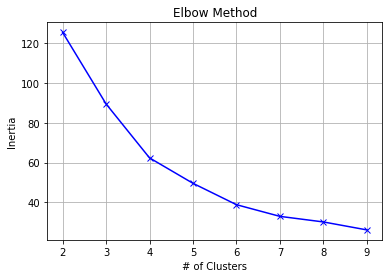

In [177]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

scores = []
for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    # score = np.average(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))
    score = model.inertia_
    scores.append(score)

plt.plot(list(range(2, 10)), scores, "bx-")
plt.grid(True)
plt.xlabel("# of Clusters")
plt.xticks(list(range(2, 10)))
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.show()

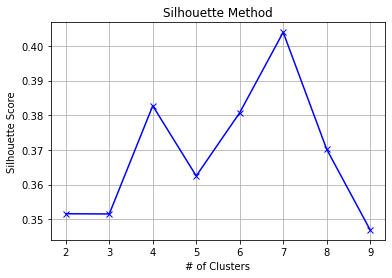

In [178]:
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

scores = []
for k in range(2, 10):
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels=labels)
    scores.append(score)

plt.plot(list(range(2, 10)), scores, "bx-")
plt.grid(True)
plt.xlabel("# of Clusters")
plt.xticks(list(range(2, 10)))
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

# Problem 3

You are given “WA_Fn-UseC_-Telco-Customer-Churn.csv” file on Telcom customer churn taken from https://www.kaggle.com/blastchar/telco-customer-churn.

You can find more information about the columns in the link provided.

Predict customer churn with:
* Logistic Regression
* Decision Tree
* Support Vector Machine
* K-Nearest Neighbor
* Neural Network methods
 
For  the  parameters  of  these  models  use  sklearn  default parameters. 

For cross-validation use 5-Fold cross validation with shuffling.

When preparing the data for prediction you can drop the customer ID.

TotalCharges column has some missing data, drop the rows having missing data in the totalcharges column.

Print the averageaccuracyscoresfor training and test splitsof cross validationas given below. 

Note that you may get different scores since we use shuffling the data in splitting step.

In [ ]:
# Code here...